# Regression(회귀)

* k-neighbors

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                         21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                         23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                         27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                         39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
                         44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                         115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                         150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                         218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                         556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                         850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                         1000.0])

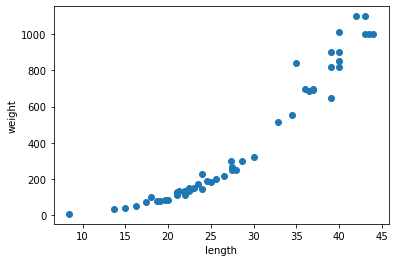

In [9]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [10]:
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [11]:
test_input

array([ 8.4, 18. , 27.5, 21.3, 22.5, 40. , 30. , 24.6, 39. , 21. , 43.5,
       16.2, 28. , 27.3])

In [15]:
test_array = np.array([1, 2, 3, 4])
print(test_array.shape)

test_array = test_array.reshape(2, 2)
print(test_array.shape)
print(test_array)

(4,)
(2, 2)
[[1 2]
 [3 4]]


In [16]:
print(test_input)
print(test_input.reshape(-1, 1))

[ 8.4 18.  27.5 21.3 22.5 40.  30.  24.6 39.  21.  43.5 16.2 28.  27.3]
[[ 8.4]
 [18. ]
 [27.5]
 [21.3]
 [22.5]
 [40. ]
 [30. ]
 [24.6]
 [39. ]
 [21. ]
 [43.5]
 [16.2]
 [28. ]
 [27.3]]


In [20]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


# 결정계수(R2)

In [24]:
from sklearn.neighbors import KNeighborsRegressor

In [25]:
knr = KNeighborsRegressor()

knr.fit(train_input, train_target)

KNeighborsRegressor()

In [ ]:
print(knr.score(test_input, test_target))

0.992809406101064


## MAE

In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
test_prediction = knr.predict(test_input)

mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


# Overfitting vs Underfitting(과대적합 vs 과소적합)

train_set이 test_set보다 성능이 낮다. -> underfitting이 되었다.
=> k-neighbors의 kfmf 5에서 3으로 낮춰본다.

In [34]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [37]:
# k를 5에서 3으로 낮추기
knr.n_neighbors = 3

# 모델 훈련
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [41]:
print('train:',knr.score(train_input, train_target))
print('test:',knr.score(test_input, test_target))

train: 0.9804899950518966
test: 0.9746459963987609


# 확인문제

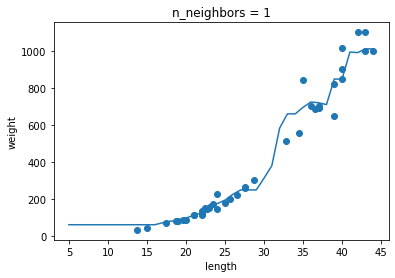

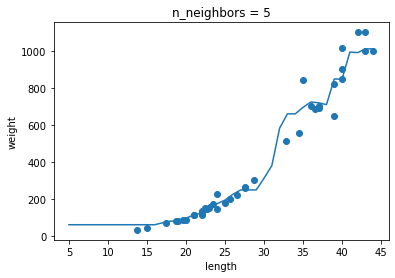

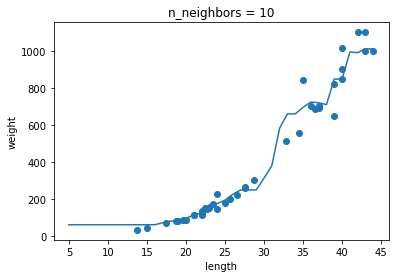

In [46]:
knr = KNeighborsRegressor()

x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 5, 10]:
    knr.n_nieghbors = n
    knr.fit(train_input, train_target)
    # prediction = knr.predict(train_input, train_target)
    prediction = knr.predict(x)
    
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()